In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
users = pd.read_csv('users.csv')
samp = pd.read_csv('sample_submission_0_1.csv')

In [3]:
print('train:', train.shape)
print('test:', test.shape)
print('users:', users.shape)
print('sample submission:', samp.shape)

train: (73539, 18)
test: (55970, 17)
users: (127886, 6)
sample submission: (55970, 2)


In [4]:
train.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


In [5]:
test.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4


In [6]:
users.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


In [7]:
train = pd.merge(train,users, how = "left", on = 'user_id')
test = pd.merge(test,users, how = "left", on = 'user_id')

### Identify data quality issues

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

In [9]:
#Check numerical features
train.describe(include=np.number).round(2)

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age
count,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,73539.00,45347.00,73260.00,73539.00,45347.00
mean,2.53,63048.60,43.66,0.91,2.78,5.02,8.38,25.28,49.01,0.91,2.80,5.42,0.16,36769.00,1.00,1.00,1.08,31.45
std,1.68,36068.01,11.22,1.75,4.57,7.90,13.42,37.85,71.82,2.89,7.69,13.98,0.36,21229.03,0.02,0.05,1.04,11.80
min,1.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-17.00
25%,1.00,31679.50,34.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,18384.50,1.00,1.00,0.00,24.00
50%,2.00,63340.00,43.00,0.00,1.00,2.00,3.00,11.00,22.00,0.00,0.00,1.00,0.00,36769.00,1.00,1.00,1.00,29.00
75%,3.00,94731.50,52.00,1.00,3.00,6.00,12.00,35.00,69.00,1.00,3.00,6.00,0.00,55153.50,1.00,1.00,2.00,36.00
max,7.00,127925.00,75.00,31.00,92.00,135.00,254.00,735.00,1260.00,157.00,531.00,783.00,1.00,73538.00,1.00,1.00,4.00,118.00


Negative value of -17 and large value of 118 in age. Further checking will be done.

In [10]:
#Check numerical features
test.describe(include=np.number).round(2)

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,attr_1,attr_2,attr_3,age
count,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,55970.00,34737.00,55802.00,55970.00,34737.00
mean,2.84,65049.01,42.21,0.77,2.44,5.32,8.98,26.29,50.71,1.12,3.22,5.93,27984.50,1.00,1.00,1.09,31.27
std,1.73,37934.95,12.28,1.75,4.79,9.05,13.98,38.57,73.29,3.50,8.20,14.23,16157.29,0.01,0.03,1.04,11.31
min,1.00,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,32293.25,35.00,0.00,0.00,0.00,0.00,2.00,4.00,0.00,0.00,0.00,13992.25,1.00,1.00,0.00,24.00
50%,3.00,64683.00,41.00,0.00,0.00,2.00,4.00,13.00,25.00,0.00,1.00,2.00,27984.50,1.00,1.00,1.00,29.00
75%,4.00,97776.50,48.00,1.00,3.00,6.00,13.00,36.00,70.00,1.00,3.00,7.00,41976.75,1.00,1.00,2.00,36.00
max,7.00,127922.00,79.00,30.00,79.00,120.00,329.00,746.00,1300.00,252.00,404.00,609.00,55969.00,1.00,1.00,4.00,118.00


In [11]:
#Check categorical features
train.describe(include = np.object).round(2)

,grass_date,last_open_day,last_login_day,last_checkout_day,domain
count,73539,73539,73539,73539,73539
unique,47,549,893,947,11
top,2019-09-02 00:00:00+08:00,Never open,1,Never checkout,@gmail.com
freq,3915,7518,10852,16905,62670


In [12]:
for col in train:
    print('Unique values of ' + col)
    print(train[col].unique())

Unique values of country_code
[4 6 1 5 2 3 7]
Unique values of grass_date
['2019-07-16 00:00:00+08:00' '2019-07-17 00:00:00+08:00'
 '2019-07-18 00:00:00+08:00' '2019-07-19 00:00:00+08:00'
 '2019-07-20 00:00:00+08:00' '2019-07-21 00:00:00+08:00'
 '2019-07-22 00:00:00+08:00' '2019-07-23 00:00:00+08:00'
 '2019-07-24 00:00:00+08:00' '2019-07-25 00:00:00+08:00'
 '2019-07-26 00:00:00+08:00' '2019-07-27 00:00:00+08:00'
 '2019-07-28 00:00:00+08:00' '2019-07-29 00:00:00+08:00'
 '2019-07-30 00:00:00+08:00' '2019-08-01 00:00:00+08:00'
 '2019-08-02 00:00:00+08:00' '2019-08-03 00:00:00+08:00'
 '2019-08-04 00:00:00+08:00' '2019-08-05 00:00:00+08:00'
 '2019-08-06 00:00:00+08:00' '2019-08-07 00:00:00+08:00'
 '2019-08-08 00:00:00+08:00' '2019-08-09 00:00:00+08:00'
 '2019-08-10 00:00:00+08:00' '2019-08-11 00:00:00+08:00'
 '2019-08-12 00:00:00+08:00' '2019-08-13 00:00:00+08:00'
 '2019-08-14 00:00:00+08:00' '2019-08-15 00:00:00+08:00'
 '2019-08-16 00:00:00+08:00' '2019-08-17 00:00:00+08:00'
 '2019-08-18 0

In [13]:
for col in train:
    print('Unique values of ' + col)
    print(train[col].nunique())

Unique values of country_code
7
Unique values of grass_date
47
Unique values of user_id
72845
Unique values of subject_line_length
56
Unique values of last_open_day
549
Unique values of last_login_day
893
Unique values of last_checkout_day
947
Unique values of open_count_last_10_days
20
Unique values of open_count_last_30_days
46
Unique values of open_count_last_60_days
76
Unique values of login_count_last_10_days
168
Unique values of login_count_last_30_days
376
Unique values of login_count_last_60_days
637
Unique values of checkout_count_last_10_days
71
Unique values of checkout_count_last_30_days
142
Unique values of checkout_count_last_60_days
219
Unique values of open_flag
2
Unique values of row_id
73539
Unique values of attr_1
2
Unique values of attr_2
2
Unique values of attr_3
5
Unique values of age
99
Unique values of domain
11


Negative values in age. Create function to check missing values.

In [14]:
for col in list(['last_checkout_day', 'last_login_day', 'last_open_day']):
    print(train[col].unique()) #never open #Never checkout Never login

['18' '8' '5' '53' '221' '70' '3' '28' '26' '12' '156' '2' '7' '86' '57'
 '23' '9' '6' '49' '16' '468' '1' 'Never checkout' '139' '128' '40' '22'
 '13' '4' '21' '60' '15' '420' '54' '50' '123' '855' '17' '95' '29' '25'
 '10' '172' '499' '11' '190' '111' '214' '186' '58' '319' '76' '1244' '20'
 '175' '14' '63' '38' '1122' '75' '83' '64' '1167' '48' '34' '290' '433'
 '168' '101' '35' '148' '39' '84' '69' '30' '32' '37' '205' '166' '143'
 '230' '19' '1118' '124' '224' '622' '676' '939' '246' '78' '46' '118'
 '61' '62' '1024' '79' '326' '415' '36' '659' '112' '107' '47' '272' '434'
 '31' '41' '142' '243' '27' '283' '45' '413' '105' '151' '316' '379' '202'
 '43' '451' '33' '68' '533' '232' '87' '91' '147' '572' '917' '144' '104'
 '59' '403' '67' '187' '306' '700' '184' '106' '66' '551' '456' '358' '55'
 '235' '452' '85' '719' '442' '51' '110' '355' '73' '310' '215' '527'
 '328' '302' '194' '259' '237' '597' '493' '71' '137' '188' '479' '743'
 '727' '746' '425' '311' '81' '474' '470' '158' '

There are words such as never open, never checkout and never login.

In [15]:
#Summary function learned from Kaggle
#Check missing values
def get_summary(df):
    cols = df.columns.tolist()
    
    "Create lists to input code"
    
    dtypes=[]
   # total_counts = []
    unique_counts =[]
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(cols)
    
    "Input specific code then append to newly created list above"
         
    for col in cols:
        dtype = str(df[col].dtype)
        dtypes.append(dtype) 
        
      #  total_count = df[col].count()
      #  total_counts.append(total_count)
        
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)
       
    "Create dataframe to store lists"
    
    summary_df = pd.DataFrame({
        'column': cols,
        'dtype': dtypes,
       'total count': total_counts,
        'unique_count': unique_counts,
        'missing_count': missing_counts,
        'missing_percentage': missing_percentages,
        
    })
        
    summary_df = summary_df.sort_values(by = 'missing_percentage', ascending = False)#.reset_index(drop=True)
    
    return summary_df

In [16]:
get_summary(test)

,column,dtype,total count,unique_count,missing_count,missing_percentage
20,age,float64,55970,98,21233,37.94
17,attr_1,float64,55970,2,21233,37.94
18,attr_2,float64,55970,2,168,0.30
0,country_code,int64,55970,7,0,0.00
1,grass_date,object,55970,26,0,0.00
19,attr_3,float64,55970,5,0,0.00
16,row_id,int64,55970,55970,0,0.00
15,checkout_count_last_60_days,int64,55970,202,0,0.00
14,checkout_count_last_30_days,int64,55970,131,0,0.00
13,checkout_count_last_10_days,int64,55970,67,0,0.00


In [17]:
get_summary(train)

,column,dtype,total count,unique_count,missing_count,missing_percentage
21,age,float64,73539,99,28192,38.34
18,attr_1,float64,73539,2,28192,38.34
19,attr_2,float64,73539,2,279,0.38
0,country_code,int64,73539,7,0,0.00
12,login_count_last_60_days,int64,73539,637,0,0.00
20,attr_3,float64,73539,5,0,0.00
17,row_id,int64,73539,73539,0,0.00
16,open_flag,int64,73539,2,0,0.00
15,checkout_count_last_60_days,int64,73539,219,0,0.00
14,checkout_count_last_30_days,int64,73539,142,0,0.00


# Handling data quality issues

Summary of data quality findings:

1. Sanity checks: 
    - -17 and 118 in age. 
2. Data type correction: 
    - country code, attr_1, 2 and 3 float to categorical but can be integer as per data description
    - grass_date: object to datetime
    - last_checkout_day (open, login included): object to int 
        - Note there are words such as *'Never login' 'Never open'
3. Missing values:
    - Age and attr_1 have the same count of missing values. Why?
    - attr_2 has some missing values
4. Typos: None
5. Extra White spaces: None
6. Capital letter mismatches: None

In [18]:
train.loc[train['age'] > 110, 'age'] = np.nan
test.loc[test['age'] > 110, 'age'] = np.nan

### Convert Data Type for Train and Test set

 - country code, attr_1, 2 and 3 float to categorical as per data description -but can be integer.
 - last_checkout_day (open, login included): object to int *'Never login' 'Never open'
 - grass_date: object to datetime

In [19]:
#Convert data type from float to obj #Function is returning null
train['country_code'] = train['country_code'].astype(str)
train['attr_1'] = train['attr_1'].astype(str)
train['attr_2'] = train['attr_2'].astype(str)
train['attr_3'] = train['attr_3'].astype(str)

test['country_code'] = test['country_code'].astype(str)
test['attr_1'] = test['attr_1'].astype(str)
test['attr_2'] = test['attr_2'].astype(str)
test['attr_3'] = test['attr_3'].astype(str)

In [20]:
#Convert data type from object to int
actions = ["open", "login", "checkout"]
for action in actions:
    train[f"last_{action}_day"] = train[f"last_{action}_day"].apply(lambda x: np.nan if x == f"Never {action}" else int(x))
    test[f"last_{action}_day"]= test[f"last_{action}_day"].apply(lambda x: np.nan if x == f"Never {action}" else int(x))      

In [21]:
#Convert object to datetime
import datetime as dt

train['grass_date'] = pd.to_datetime(train['grass_date'])
test['grass_date'] = pd.to_datetime(test['grass_date'])

### Sanity check for Age

In [22]:
for col in list(['age']):
    print('Before transformation unique values of train' + col)
    print(train[col].unique())
    print('Before transformation unique values of test' + col)
    print(test[col].unique())
    print('After transformation train:')
    train[col] = train[col].replace(train.loc[train[col] > 110, 'age'], np.nan)
    train[col] = train[col].replace(train.loc[train[col] < 0, 'age'], np.nan)
    print(train[col].unique())
    print('After transformation test:')
    test[col] = test[col].replace(test.loc[test[col] > 110, 'age'], np.nan)
    test[col] = test[col].replace(test.loc[test[col] < 0, 'age'], np.nan)
    print(test[col].unique())
    print('')

Before transformation unique values of trainage
[ 47.  25.  nan  24.  35.  22.  31.  40.  26.  33.   0.  38.  50.  27.
  39.  28.  30.  21.  23.  29.  34.  43.  37.  32.  36.   1.  42.  45.
  41.  19.  49.  20.  48.  54.  46.  17.  52.  56.  58.  55.  51.  44.
  16.  18.  72.  53.  59.  60.  69.   2.  15.  63.  11.  62.  65.  14.
   5.  66.  57.  81.   9.  75.  74.  76. 100.  64.  70.  68.   8.  12.
  61.  67.  92.   4.   3.   7.  95. 109.  71.  13.  80.   6. 105.  97.
 110. 101.  10.  98. 108. 107.  73. -17.  99.  93. -16. 104.]
Before transformation unique values of testage
[ nan  33.  22.  40.  23.  31.  24.  59.  28.   5.  32.  30.  19.  35.
  48.  34.  26.  29.  41.  36.  27.  50.  42.  25.  53.  45.   4.  49.
  43.  39.  21.  37.  70.  46.  44.   0.  38.  51.  18.  16.  57.  20.
  67.   1.  56.   7.  64.  63.  71.   3.  54.  17.  55.  61.  52.  60.
 106.  47.  62.  15.  72.  65.  12.  13.  14.   2.  10.   6.  68.  69.
   8. 103.  66.  58.   9.  98. 107.  11.  74.  73.  87.  92. 1

### Deal with missing values
Impute the NaN categorical missing values with mode.

In [23]:
attr_cols = ['attr_1', 'attr_2', 'attr_3']
for col in attr_cols:
    print('Before transformation, unique values for Train ' + col)
    print(train[col].unique())
    print('Before transformation, unique values for Test ' + col)
    print(test[col].unique())
    print('\nAfter transformation Train:')
    train[col] = train[col].fillna(train[col].mode()[0])
    print(train[col].unique())
    print('\nAfter transformation Test:')
    test[col] = test[col].fillna(test[col].mode()[0])
    print(test[col].unique())
    print('')

Before transformation, unique values for Train attr_1
['1.0' 'nan' '0.0']
Before transformation, unique values for Test attr_1
['nan' '1.0' '0.0']

After transformation Train:
['1.0' 'nan' '0.0']

After transformation Test:
['nan' '1.0' '0.0']

Before transformation, unique values for Train attr_2
['1.0' 'nan' '0.0']
Before transformation, unique values for Test attr_2
['1.0' '0.0' 'nan']

After transformation Train:
['1.0' 'nan' '0.0']

After transformation Test:
['1.0' '0.0' 'nan']

Before transformation, unique values for Train attr_3
['2.0' '0.0' '1.0' '4.0' '3.0']
Before transformation, unique values for Test attr_3
['0.0' '2.0' '1.0' '4.0' '3.0']

After transformation Train:
['2.0' '0.0' '1.0' '4.0' '3.0']

After transformation Test:
['0.0' '2.0' '1.0' '4.0' '3.0']



Numerical features, one of the most efficient ways to impute numerical features NaN values is via its corresponding Median.

In [24]:
numericalColumn = ['age','last_open_day', 'last_login_day','last_checkout_day']
for col in numericalColumn:
    print('Before transformation, unique values for ' + col)
    print(train[col].unique())
    print('Before transformation, unique values for Test ' + col)
    print(test[col].unique())
    print('\nAfter transformation')
    train[col] = train[col].fillna(train[col].median())
    train[col] = train[col].astype(int)
    print(train[col].unique())
    print('\nAfter transformation')
    test[col] = test[col].fillna(test[col].median())
    test[col] = test[col].astype(int)
    print(test[col].unique())
    print('')

Before transformation, unique values for age
[ 47.  25.  nan  24.  35.  22.  31.  40.  26.  33.   0.  38.  50.  27.
  39.  28.  30.  21.  23.  29.  34.  43.  37.  32.  36.   1.  42.  45.
  41.  19.  49.  20.  48.  54.  46.  17.  52.  56.  58.  55.  51.  44.
  16.  18.  72.  53.  59.  60.  69.   2.  15.  63.  11.  62.  65.  14.
   5.  66.  57.  81.   9.  75.  74.  76. 100.  64.  70.  68.   8.  12.
  61.  67.  92.   4.   3.   7.  95. 109.  71.  13.  80.   6. 105.  97.
 110. 101.  10.  98. 108. 107.  73.  99.  93. 104.]
Before transformation, unique values for Test age
[ nan  33.  22.  40.  23.  31.  24.  59.  28.   5.  32.  30.  19.  35.
  48.  34.  26.  29.  41.  36.  27.  50.  42.  25.  53.  45.   4.  49.
  43.  39.  21.  37.  70.  46.  44.   0.  38.  51.  18.  16.  57.  20.
  67.   1.  56.   7.  64.  63.  71.   3.  54.  17.  55.  61.  52.  60.
 106.  47.  62.  15.  72.  65.  12.  13.  14.   2.  10.   6.  68.  69.
   8. 103.  66.  58.   9.  98. 107.  11.  74.  73.  87.  92. 109.  93.
 

In [25]:
get_summary(test)

,column,dtype,total count,unique_count,missing_count,missing_percentage
0,country_code,object,55970,7,0,0.0
1,grass_date,"datetime64[ns, pytz.FixedOffset(480)]",55970,26,0,0.0
20,age,int32,55970,92,0,0.0
19,attr_3,object,55970,5,0,0.0
18,attr_2,object,55970,3,0,0.0
17,attr_1,object,55970,3,0,0.0
16,row_id,int64,55970,55970,0,0.0
15,checkout_count_last_60_days,int64,55970,202,0,0.0
14,checkout_count_last_30_days,int64,55970,131,0,0.0
13,checkout_count_last_10_days,int64,55970,67,0,0.0


In [26]:
get_summary(train)

,column,dtype,total count,unique_count,missing_count,missing_percentage
0,country_code,object,73539,7,0,0.0
12,login_count_last_60_days,int64,73539,637,0,0.0
21,age,int32,73539,93,0,0.0
20,attr_3,object,73539,5,0,0.0
19,attr_2,object,73539,3,0,0.0
18,attr_1,object,73539,3,0,0.0
17,row_id,int64,73539,73539,0,0.0
16,open_flag,int64,73539,2,0,0.0
15,checkout_count_last_60_days,int64,73539,219,0,0.0
14,checkout_count_last_30_days,int64,73539,142,0,0.0


# EDA - Numerical Vars

#### Explore all numerical columns

In [27]:
#Check numerical features
train_numcols = train.describe(include=np.number).round(2)

In [28]:
train_numcols.columns

Index(['user_id', 'subject_line_length', 'last_open_day', 'last_login_day',
       'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'open_flag', 'row_id', 'age'],
      dtype='object')

In [29]:
#Check numerical features
test_numcols = test.describe(include=np.number).round(2)

In [30]:
test_numcols.columns

Index(['user_id', 'subject_line_length', 'last_open_day', 'last_login_day',
       'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'row_id',
       'age'],
      dtype='object')

In [31]:
#Remove ID columns because unecessary
numfeatures = ['last_open_day', 'last_login_day',
       'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'open_flag', 'age']

In [32]:
#Histogram plot
def get_histogram(df1, features, size = [4,5]):
    i=0
    sns.set_style("whitegrid")
    
    plt.figure()
    fig, ax = plt.subplots(size[0], size[1], figsize=(20,16))
    
    for feature in features:
        i += 1
        plt.subplot(3,5, i) #size[0], size[1]
        plt.subplots_adjust(hspace=0.5,wspace = 0.5)
        
        df1[feature].hist()
        #sns.distplot(df1[feature], hist = True, kde=False) #bandwidth
        #sns.distplot(df2[feature], hist = False, label=label2,  kde_kws={'bw':True})
        
        plt.title('Histogram of {}'.format(feature), fontsize = 14)
        plt.xlabel(feature, fontsize = 14)
        
    plt.show()

<Figure size 432x288 with 0 Axes>

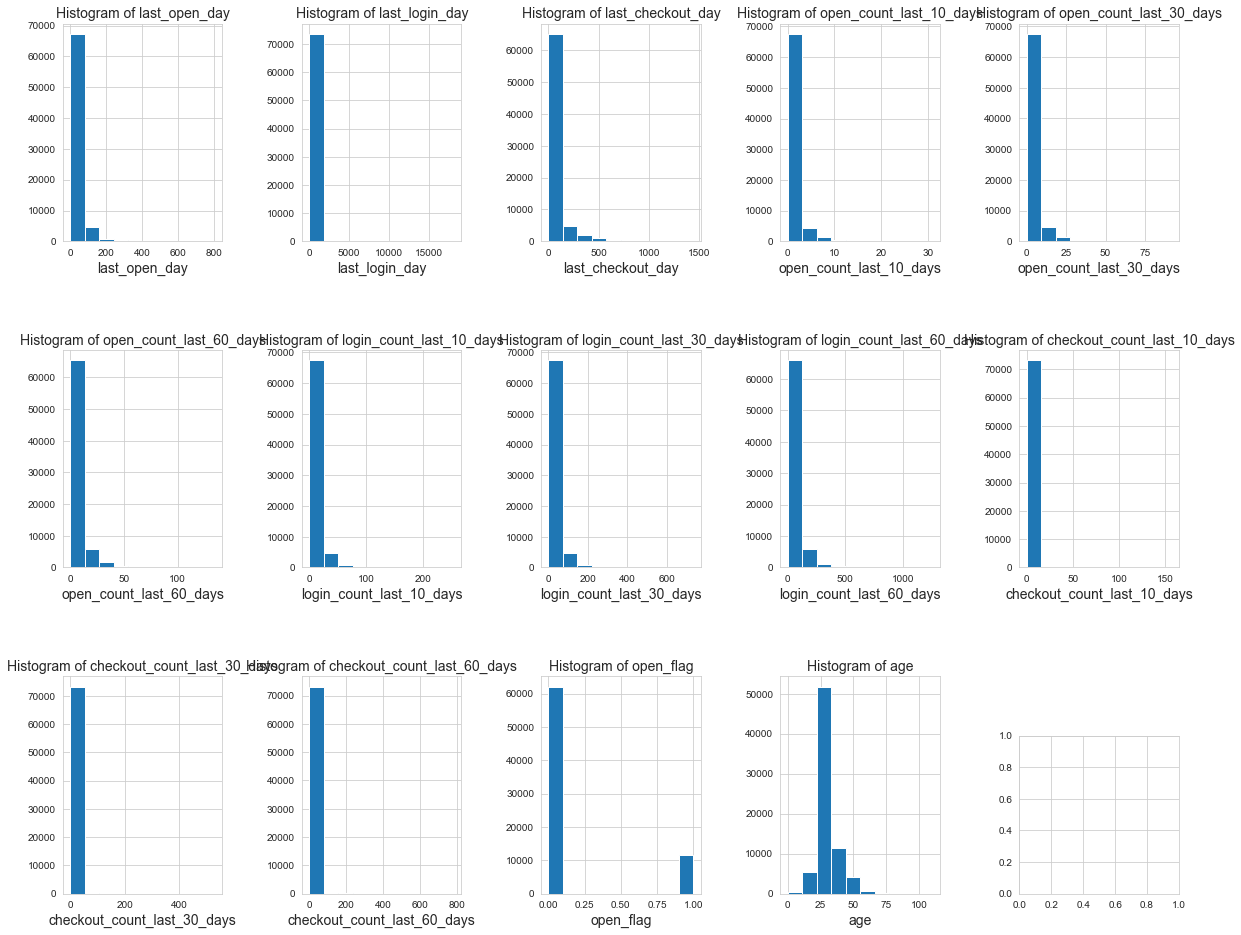

In [33]:
get_histogram(train,numfeatures)

### Explore open flag email aka Target feature

Target feature 
 - 0 did not open email
 - 1 did open email

In [34]:
train['open_flag'].value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

In [35]:
target_openflag_0 = train.loc[train['open_flag'] == 0]
target_openflag_1 = train.loc[train['open_flag'] ==1]

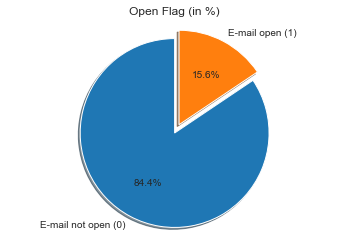

In [36]:
labels = ['E-mail not open (0)', 'E-mail open (1)']
sizes =  len(target_openflag_0),len(target_openflag_1)
explode = (0,.1,) 

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title("Open Flag (in %)")

plt.show()

Imbalance classification. Only 15.6% open their emails.

In [37]:
#Density plot
def get_density(df1, df2, label1, label2, features, size = [3,5]):
    i=0
    sns.set_style("whitegrid")
    
    plt.figure()
    fig, ax = plt.subplots(size[0], size[1], figsize=(20,16))
    
    for feature in features:
        i += 1
        plt.subplot(3, 5, i) #size[0], size[1]
        plt.subplots_adjust(hspace=0.5,wspace = 0.5)
        
        sns.distplot(df1[feature], hist = False,label=label1, kde_kws={'bw':True}) #bandwidth
        sns.distplot(df2[feature], hist = False, label=label2,  kde_kws={'bw':True})
        
      #  plt.title('Distplot of {}'.format(feature), fontsize = 14)
        plt.xlabel(feature, fontsize = 14)
        
    plt.show()

<Figure size 432x288 with 0 Axes>

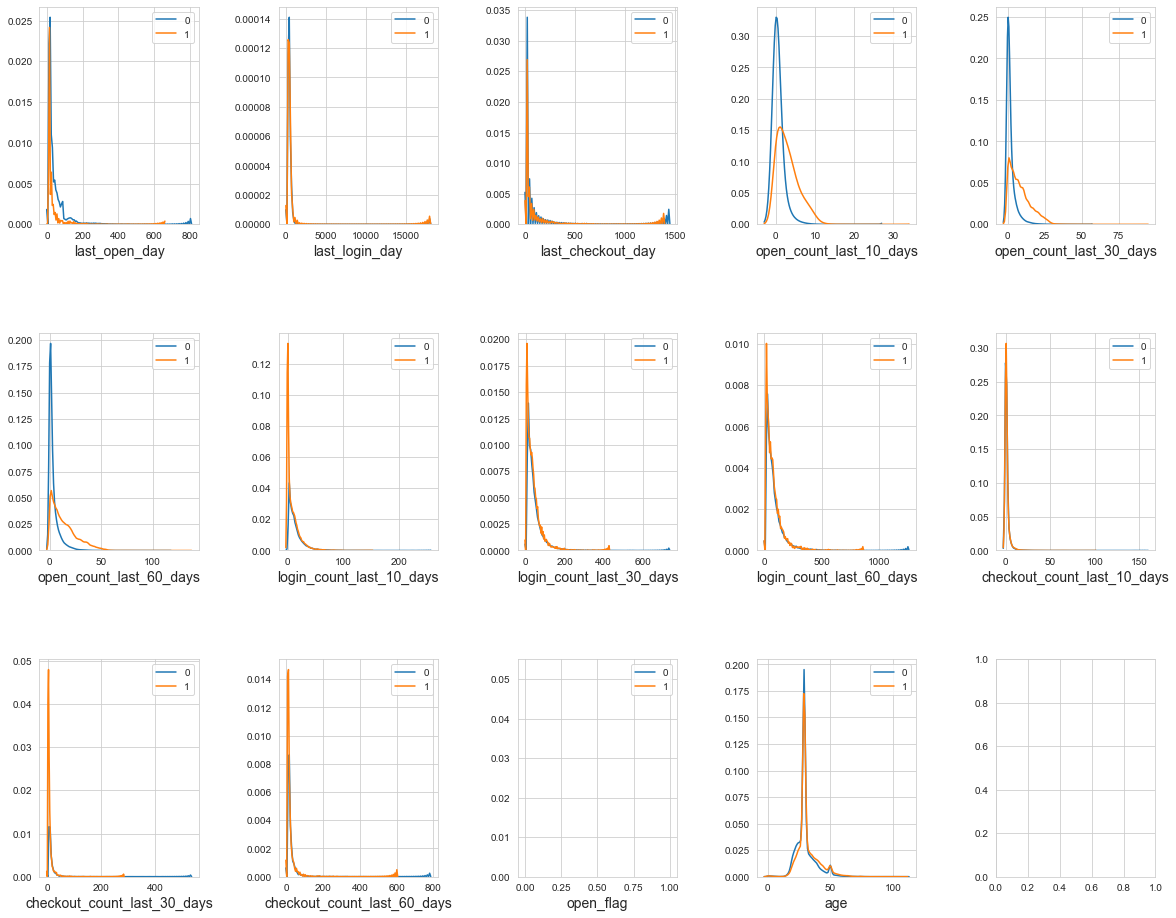

In [38]:
get_density(target_openflag_0,target_openflag_1, '0', '1',numfeatures)

Key points:
The distribution of open_flag = 1 and open_flag = 0 have different fluctuations. 
1. The subject_line_length with 40 to 50 words has a high probability of email opened, open_flag = 1. 
    - Note that subject line may vary depending on perhaps google translation per country.
    - subject line with same length doesn't necessary have the same content.
    - Thus may create overfit.

2. open_count_{duration}_dat feature shows how often customers open Shopee's email. It's given that there is a high probability that an email will be opened within 10 days the moment it has been received.

3. age: younger age bracket/millenials/gen-z tend to not open the Shopee emails.

4. last_open_day: the longer the customers did not open the Shopee email the less likely for them to open the campaign email.

# EDA - Categorical Vars

In [39]:
categorical_cols = train.columns[train.dtypes == np.object].tolist()
categorical_cols

['country_code', 'attr_1', 'attr_2', 'attr_3', 'domain']

In [40]:
for categorical_col in categorical_cols:
    print(categorical_col + ':')
    print(train[categorical_col].unique())
    print('\n')

country_code:
['4' '6' '1' '5' '2' '3' '7']


attr_1:
['1.0' 'nan' '0.0']


attr_2:
['1.0' 'nan' '0.0']


attr_3:
['2.0' '0.0' '1.0' '4.0' '3.0']


domain:
['@gmail.com' '@hotmail.com' '@yahoo.com' '@icloud.com' 'other'
 '@outlook.com' '@ymail.com' '@live.com' '@163.com' '@qq.com'
 '@rocketmail.com']




In [41]:
#Histogram plot
def get_histogram2(df1, features, size = [4,5]):
    i=0
    sns.set_style("whitegrid")
    
    plt.figure()
    fig, ax = plt.subplots(size[0], size[1], figsize=(11,4))
    
    for feature in features:
        i += 1
        plt.subplot(1,5, i) #size[0], size[1]
        plt.subplots_adjust(hspace=0.5,wspace = 0.5)
        
        plot =df1[feature].hist()
        #sns.distplot(df1[feature], hist = True, kde=False) #bandwidth
        #sns.distplot(df2[feature], hist = False, label=label2,  kde_kws={'bw':True})
       # plot.set_xticklabels(plot.get_xticklabels(),rotation=40)
        plt.title('Barchart of {}'.format(feature), fontsize = 14)
        plt.xlabel(feature, fontsize = 14)
        
        
plt.show()

<Figure size 432x288 with 0 Axes>

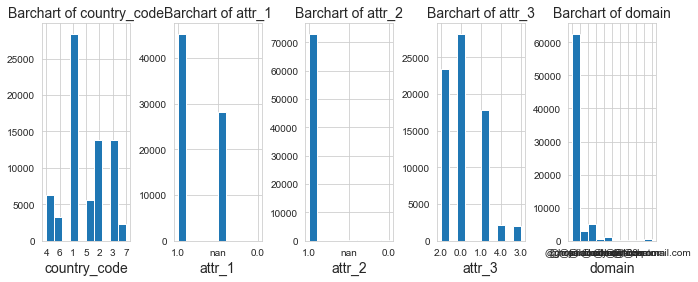

In [42]:
get_histogram2(train,categorical_cols)

<Figure size 432x288 with 0 Axes>

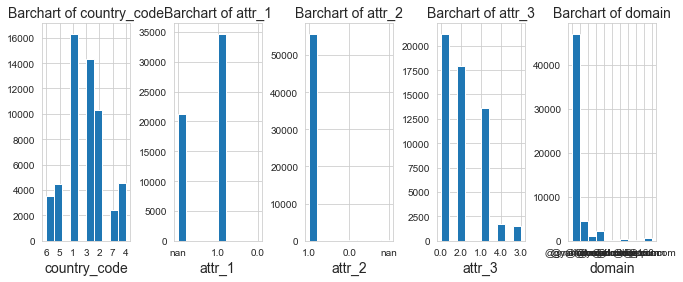

In [43]:
get_histogram2(test,categorical_cols)

In [44]:
attr_cols = ['attr_1', 'attr_2', 'attr_3']
for col in attr_cols:
    print('Before transformation, unique values for Train ' + col)
    print(train[col].unique())
    print('Before transformation, unique values for Test ' + col)
    print(test[col].unique())
    print('\nAfter transformation Train:')
    train[col] = train[col].replace({'nan': -1})
    print(train[col].unique())
    print('\nAfter transformation Test:')
    test[col] = test[col].replace({'nan': -1})
    print(test[col].unique())
    print('')

Before transformation, unique values for Train attr_1
['1.0' 'nan' '0.0']
Before transformation, unique values for Test attr_1
['nan' '1.0' '0.0']

After transformation Train:
['1.0' -1 '0.0']

After transformation Test:
[-1 '1.0' '0.0']

Before transformation, unique values for Train attr_2
['1.0' 'nan' '0.0']
Before transformation, unique values for Test attr_2
['1.0' '0.0' 'nan']

After transformation Train:
['1.0' -1 '0.0']

After transformation Test:
['1.0' '0.0' -1]

Before transformation, unique values for Train attr_3
['2.0' '0.0' '1.0' '4.0' '3.0']
Before transformation, unique values for Test attr_3
['0.0' '2.0' '1.0' '4.0' '3.0']

After transformation Train:
['2.0' '0.0' '1.0' '4.0' '3.0']

After transformation Test:
['0.0' '2.0' '1.0' '4.0' '3.0']



# EDA - Date time 

In [45]:
train['grass_date'].describe()

count                         73539
unique                           47
top       2019-09-02 00:00:00+08:00
freq                           3915
first     2019-07-16 00:00:00+08:00
last      2019-09-02 00:00:00+08:00
Name: grass_date, dtype: object

In [46]:
test['grass_date'].describe()

count                         55970
unique                           26
top       2019-09-09 00:00:00+08:00
freq                           8034
first     2019-09-03 00:00:00+08:00
last      2019-09-29 00:00:00+08:00
Name: grass_date, dtype: object

# EDA - Email domain

(array([62670.,  2929.,  5181.,   439.,  1199.,   259.,   194.,   169.,
          108.,   391.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

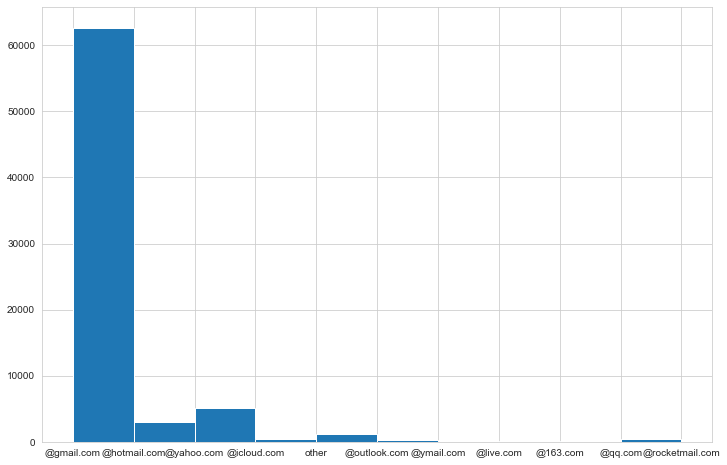

In [47]:
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(train['domain'])

(array([47071.,  4395.,  1037.,  2094.,   154.,    61.,   358.,   160.,
          137.,   503.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

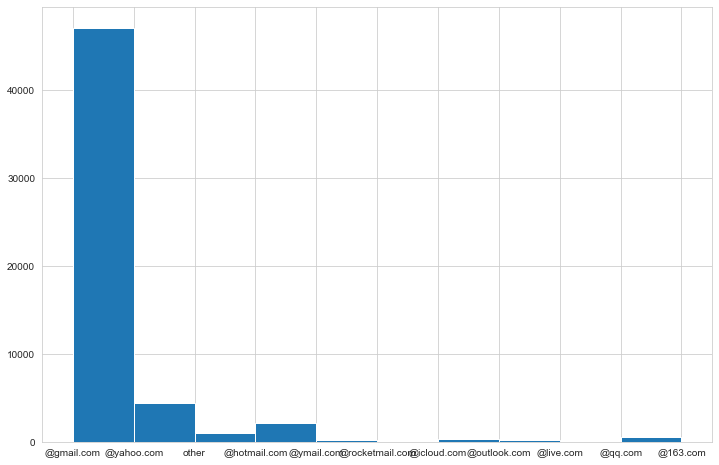

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(test['domain'])

# Feature Engineering

Add new features from grassdate and domain

In [49]:
def feature_eng(df, feature):
        
        #add new col names for train  and test and split date time
        df[['grassdate','grasstime']] = df[feature].apply(lambda x: pd.Series(str(x).split(" ")))
        #drop existing grass_date col
        df.drop([feature],axis=1, inplace=True)
        #convert to datetime again
        df['grassdate']=pd.to_datetime(df['grassdate'])
        
        df['Year_Month'] = df['grassdate'].dt.strftime('%Y-%m') #add year-month
        df['Year'] = df['grassdate'].dt.strftime('%Y') #Year
        df['Month'] = df['grassdate'].dt.strftime('%m') #month
        df['DayofMonth'] = df['grassdate'].dt.day #day of month
        df['DayofWeek'] = df['grassdate'].dt.day_name() # day of week
        return df

In [50]:
feature_eng(train,'grass_date')

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_3,age,domain,grassdate,grasstime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,4,43,44,19,6,18,0,2,4,12,...,2.0,47,@gmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
1,4,102,44,9,4,8,2,9,17,18,...,2.0,25,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
2,6,177,49,14,5,5,0,4,12,24,...,0.0,29,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
3,1,184,49,49,9,53,0,0,1,9,...,2.0,24,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
4,6,221,49,227,6,221,0,0,0,2,...,0.0,29,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,127613,39,24,36,279,0,1,1,0,...,0.0,29,@hotmail.com,2019-09-02,00:00:00+08:00,2019-09,2019,09,2,Monday
73535,2,127620,38,46,10,51,0,0,1,0,...,2.0,30,@gmail.com,2019-09-02,00:00:00+08:00,2019-09,2019,09,2,Monday
73536,2,127696,32,14,8,22,0,0,0,0,...,0.0,29,@gmail.com,2019-09-02,00:00:00+08:00,2019-09,2019,09,2,Monday
73537,2,127807,38,5,34,22,2,4,4,0,...,1.0,38,@gmail.com,2019-09-02,00:00:00+08:00,2019-09,2019,09,2,Monday


In [51]:
feature_eng(test,'grass_date')

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_3,age,domain,grassdate,grasstime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,6,0,35,27,2,13,2,3,4,10,...,0.0,29,@gmail.com,2019-09-03,00:00:00+08:00,2019-09,2019,09,3,Tuesday
1,6,130,35,7,5,383,1,1,1,5,...,0.0,29,@gmail.com,2019-09-03,00:00:00+08:00,2019-09,2019,09,3,Tuesday
2,5,150,25,34,1,3,0,0,0,13,...,2.0,33,@gmail.com,2019-09-03,00:00:00+08:00,2019-09,2019,09,3,Tuesday
3,1,181,36,63,5,5,0,0,0,43,...,2.0,22,@yahoo.com,2019-09-03,00:00:00+08:00,2019-09,2019,09,3,Tuesday
4,5,192,23,6,5,54,0,0,0,4,...,0.0,29,@gmail.com,2019-09-03,00:00:00+08:00,2019-09,2019,09,3,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,127348,53,18,4,8,0,0,0,0,...,0.0,29,@gmail.com,2019-09-29,00:00:00+08:00,2019-09,2019,09,29,Sunday
55966,6,127396,53,59,802,1207,0,0,1,0,...,0.0,29,@gmail.com,2019-09-29,00:00:00+08:00,2019-09,2019,09,29,Sunday
55967,6,127574,43,18,7,19,0,0,0,0,...,0.0,29,@hotmail.com,2019-09-29,00:00:00+08:00,2019-09,2019,09,29,Sunday
55968,6,127887,43,5,5,6,2,5,14,0,...,0.0,29,@gmail.com,2019-09-29,00:00:00+08:00,2019-09,2019,09,29,Sunday


Text(0.5, 1.0, 'Time series plot of orders placed annually by purchasers for services')

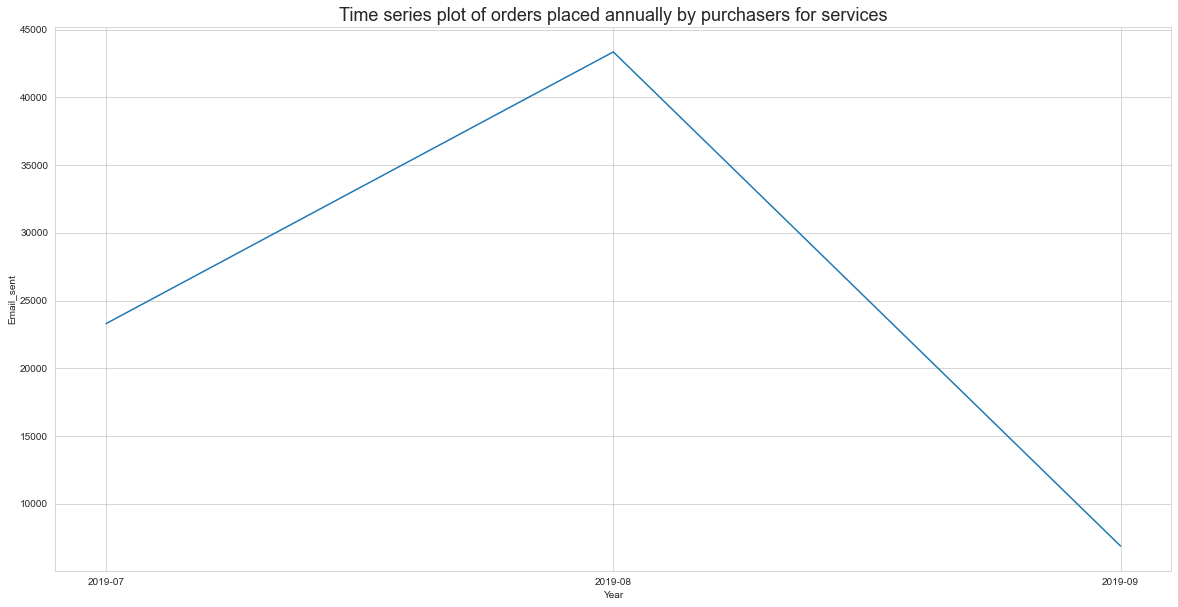

In [52]:
Count_Year_month=train.groupby('Year_Month').size().reset_index().rename(columns={0: 'Email_sent'})
Count_Year_month

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Count_Year_month['Year_Month'],Count_Year_month['Email_sent'])
ax.set_ylabel('Email_sent')
ax.set_xlabel('Year')
ax.set_title('Time series plot of orders placed annually by purchasers for services', size=18)

In [53]:
Count_Year_month

,Year_Month,Email_sent
0,2019-07,23301
1,2019-08,43358
2,2019-09,6880


Year is irrelevant, month can be considered. Check day of week.

In [54]:
train['DayofWeek'].value_counts()

Monday       14499
Tuesday      13595
Thursday     11339
Friday       10356
Sunday        9854
Wednesday     8357
Saturday      5539
Name: DayofWeek, dtype: int64

In [55]:
test['DayofWeek'].value_counts()

Monday       12019
Tuesday      10430
Thursday      8121
Friday        7703
Wednesday     6829
Saturday      6058
Sunday        4810
Name: DayofWeek, dtype: int64

DoW seems relevant.

In [56]:
train.head()

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_3,age,domain,grassdate,grasstime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,4,43,44,19,6,18,0,2,4,12,...,2.0,47,@gmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
1,4,102,44,9,4,8,2,9,17,18,...,2.0,25,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
2,6,177,49,14,5,5,0,4,12,24,...,0.0,29,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
3,1,184,49,49,9,53,0,0,1,9,...,2.0,24,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
4,6,221,49,227,6,221,0,0,0,2,...,0.0,29,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday


# Machine Learning Data Prep - Making Categorical Features Numeric for Modelling

## Equal frequency binning

In [57]:
for col in ['age']:
    print('Before Discretizing unique values for train' + col)
    print(train[col].unique())
    print('Before Discretizing unique values for test' + col)
    print(test[col].unique())

Before Discretizing unique values for trainage
[ 47  25  29  24  35  22  31  40  26  33   0  38  50  27  39  28  30  21
  23  34  43  37  32  36   1  42  45  41  19  49  20  48  54  46  17  52
  56  58  55  51  44  16  18  72  53  59  60  69   2  15  63  11  62  65
  14   5  66  57  81   9  75  74  76 100  64  70  68   8  12  61  67  92
   4   3   7  95 109  71  13  80   6 105  97 110 101  10  98 108 107  73
  99  93 104]
Before Discretizing unique values for testage
[ 29  33  22  40  23  31  24  59  28   5  32  30  19  35  48  34  26  41
  36  27  50  42  25  53  45   4  49  43  39  21  37  70  46  44   0  38
  51  18  16  57  20  67   1  56   7  64  63  71   3  54  17  55  61  52
  60 106  47  62  15  72  65  12  13  14   2  10   6  68  69   8 103  66
  58   9  98 107  11  74  73  87  92 109  93  75  80  76  77 110 100  91
 105  95]


In [58]:
train['age'] = pd.qcut(train['age'], q=2, labels=['young', 'old'])
test['age'] = pd.qcut(test['age'], q=2, labels=['young', 'old'])

In [59]:
for col in ['age']:
    print('\nAfter transformation train')
    print(train[col].unique())
    print('')
    print('\nAfter transformation test')
    print(test[col].unique())


After transformation train
[old, young]
Categories (2, object): [young < old]


After transformation test
[young, old]
Categories (2, object): [young < old]


## Integer encoding - Ordinal

In [60]:
level_mapping_age = {'young': 0, 'old': 1} #Apply level mapping
level_mapping_age

{'young': 0, 'old': 1}

In [61]:
train['age'] = train['age'].replace(level_mapping_age)
test['age'] = test['age'].replace(level_mapping_age)

In [62]:
for col in ['age']:
    print('\nAfter transformation train')
    print(train[col].unique())
    print('')
    print('\nAfter transformation test')
    print(test[col].unique())


After transformation train
[1 0]


After transformation test
[0 1]


In [63]:
level_mapping_year = {'young': 0, 'old': 1} #Apply level mapping
level_mapping_age

{'young': 0, 'old': 1}

## Label encoding target feature

In [64]:
train.head()

,country_code,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_3,age,domain,grassdate,grasstime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,4,43,44,19,6,18,0,2,4,12,...,2.0,1,@gmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
1,4,102,44,9,4,8,2,9,17,18,...,2.0,0,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
2,6,177,49,14,5,5,0,4,12,24,...,0.0,0,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
3,1,184,49,49,9,53,0,0,1,9,...,2.0,0,@yahoo.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday
4,6,221,49,227,6,221,0,0,0,2,...,0.0,0,@hotmail.com,2019-07-16,00:00:00+08:00,2019-07,2019,07,16,Tuesday


In [65]:
train.columns

Index(['country_code', 'user_id', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'open_flag', 'row_id', 'attr_1', 'attr_2', 'attr_3', 'age', 'domain',
       'grassdate', 'grasstime', 'Year_Month', 'Year', 'Month', 'DayofMonth',
       'DayofWeek'],
      dtype='object')

In [66]:
target = train['open_flag']
Data = train.drop(['user_id','row_id','Year_Month','grasstime', 'grassdate', 'Year', 'Month'],axis=1)
test.drop(['user_id','row_id','Year_Month','grasstime', 'grassdate', 'Year', 'Month'],axis=1, inplace=True)
target.value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

## One hot encoding - Nominal

In [67]:
categorical_cols = Data.columns[Data.dtypes == np.object].tolist()
categorical_cols

['country_code', 'attr_1', 'attr_2', 'attr_3', 'domain', 'DayofWeek']

In [68]:
for categorical in categorical_cols:
    print(categorical + ':')
    print(Data[categorical].value_counts())
    print('\n')

country_code:
1    28423
2    13874
3    13845
4     6302
5     5536
6     3221
7     2338
Name: country_code, dtype: int64


attr_1:
1.0    45336
-1     28192
0.0       11
Name: attr_1, dtype: int64


attr_2:
1.0    73059
-1       279
0.0      201
Name: attr_2, dtype: int64


attr_3:
0.0    28208
2.0    23404
1.0    17760
4.0     2196
3.0     1971
Name: attr_3, dtype: int64


domain:
@gmail.com         62670
@yahoo.com          5181
@hotmail.com        2929
other               1199
@icloud.com          439
@qq.com              338
@outlook.com         259
@ymail.com           194
@live.com            169
@163.com             108
@rocketmail.com       53
Name: domain, dtype: int64


DayofWeek:
Monday       14499
Tuesday      13595
Thursday     11339
Friday       10356
Sunday        9854
Wednesday     8357
Saturday      5539
Name: DayofWeek, dtype: int64




In [69]:
#One-Hot Encoding for Binary values
for col in ['domain','DayofWeek']:
    q = len(Data[col].unique())
    if (q == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

#One-Hot Encoding for Non-Binary values
Data = pd.get_dummies(Data)

In [70]:
#One-Hot Encoding for Binary values
for col in ['domain','DayofWeek']:
    q = len(test[col].unique())
    if (q == 2):
        test[col] = pd.get_dummies(test[col], drop_first=True)

#One-Hot Encoding for Non-Binary values
test = pd.get_dummies(test)

In [71]:
Data.head()

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,44,19,6,18,0,2,4,12,43,99,...,0,0,0,0,0,0,0,0,1,0
1,44,9,4,8,2,9,17,18,48,90,...,0,0,0,0,0,0,0,0,1,0
2,49,14,5,5,0,4,12,24,69,119,...,1,0,0,0,0,0,0,0,1,0
3,49,49,9,53,0,0,1,9,23,69,...,1,0,0,0,0,0,0,0,1,0
4,49,227,6,221,0,0,0,2,5,5,...,0,0,0,0,0,0,0,0,1,0


In [72]:
test.head()

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,35,27,2,13,2,3,4,10,34,134,...,0,0,0,0,0,0,0,0,1,0
1,35,7,5,383,1,1,1,5,5,5,...,0,0,0,0,0,0,0,0,1,0
2,25,34,1,3,0,0,0,13,19,38,...,0,0,0,0,0,0,0,0,1,0
3,36,63,5,5,0,0,0,43,110,173,...,1,0,0,0,0,0,0,0,1,0
4,23,6,5,54,0,0,0,4,12,39,...,0,0,0,0,0,0,0,0,1,0


# Normalization

In [73]:
Data_copy = Data.copy()  

from sklearn import preprocessing 
Data_MinMax_scaler = preprocessing.MinMaxScaler()
Data_MinMax_scaler.fit(Data)

MinMaxScaler()

In [74]:
Data = Data_MinMax_scaler.fit_transform(Data)
Data

array([[5.23076923e-01, 2.23048327e-02, 3.30742517e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.23076923e-01, 9.91325898e-03, 2.20495011e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e-01, 1.61090458e-02, 2.75618764e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.38461538e-01, 1.61090458e-02, 4.40990023e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.30769231e-01, 4.95662949e-03, 1.87420760e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46153846e-01, 0.00000000e+00, 1.65371258e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [75]:
Data = pd.DataFrame(Data, columns=Data_copy.columns)
target = Data['open_flag']
Data.drop("open_flag", axis = 1, inplace=True)
print(Data.shape)
Data.head()

(73539, 51)


,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,0.523077,0.022305,0.000331,0.011773,0.000000,0.021739,0.029630,0.047244,0.058503,0.078571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.523077,0.009913,0.000220,0.004848,0.064516,0.097826,0.125926,0.070866,0.065306,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.600000,0.016109,0.000276,0.002770,0.000000,0.043478,0.088889,0.094488,0.093878,0.094444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.600000,0.059480,0.000496,0.036011,0.000000,0.000000,0.007407,0.035433,0.031293,0.054762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.600000,0.280050,0.000331,0.152355,0.000000,0.000000,0.000000,0.007874,0.006803,0.003968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
test_copy = test.copy()  
Data_MinMax_scaler.fit(test)
test = Data_MinMax_scaler.fit_transform(test)

In [77]:
test = pd.DataFrame(test, columns=test_copy.columns)
print(test.shape)
test.head()

(55970, 51)


,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,0.352941,0.032059,0.000110,0.008214,0.066667,0.037975,0.033333,0.030395,0.045576,0.103077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.352941,0.007398,0.000275,0.261465,0.033333,0.012658,0.008333,0.015198,0.006702,0.003846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.205882,0.040691,0.000055,0.001369,0.000000,0.000000,0.000000,0.039514,0.025469,0.029231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.367647,0.076449,0.000275,0.002738,0.000000,0.000000,0.000000,0.130699,0.147453,0.133077,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.176471,0.006165,0.000275,0.036277,0.000000,0.000000,0.000000,0.012158,0.016086,0.030000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
target.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: open_flag, dtype: float64

# Predictive Modelling - LGBM

In [79]:
!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import matthews_corrcoef

import time

In [80]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [81]:
X_test = test

In [82]:
print(X_train.shape) 
print(X_valid.shape)
print(X_test.shape)

(51477, 51)
(22062, 51)
(55970, 51)


In [84]:
param = {'num_leaves': 10,
         'min_data_in_leaf': 5, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.005,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 2020,
         "metric": 'auc',
         "tree_learner": "voting",
         "lambda_l1": 0.3,
         "random_state": 999,
         "verbosity": -1}

In [85]:
cols = Data.columns

In [86]:
# manual folds
max_iter = 5
folds = KFold(n_splits=max_iter, shuffle=True, random_state=2020)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_valid))
predictions_test = np.zeros(len(X_test))

start = time.time()
feature_importance_df = pd.DataFrame()
start_time= time.time()
score = [0 for _ in range(folds.n_splits)]

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][cols],
                           label=y_train.iloc[trn_idx],
                          )
    val_data = lgb.Dataset(X_train.iloc[val_idx][cols],
                           label=y_train.iloc[val_idx],
                          )

    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=250,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = (clf.predict(X_train.iloc[val_idx][cols], num_iteration=clf.best_iteration) > 0.5).astype(int)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = cols
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
   
    # print("time elapsed: {:<5.2}s".format((time.time() - start_time) / 3600))
    score[fold_] = matthews_corrcoef(y_train.iloc[val_idx], oof[val_idx])
    
    predictions += clf.predict(X_valid[cols], num_iteration=clf.best_iteration)
    predictions_test += clf.predict(X_test[cols], num_iteration=clf.best_iteration)
    if fold_ == max_iter - 1: break
        
if (folds.n_splits == max_iter):
    print("CV score: {:<8.5f}".format(matthews_corrcoef(y_train, oof)))
else:
    print("CV score: {:<8.5f}".format(sum(score) / max_iter))
        
prediction_end = ((predictions / ((fold_ + 1) / 2) ) > 0.5).astype(int) 
print("VALID score: {:<8.5f} ".format(matthews_corrcoef(y_valid, prediction_end)))

predictions_test_end = ((predictions_test / ((fold_ + 1) / 2) ) > 0.5).astype(int) 

fold n°0
Training until validation scores don't improve for 200 rounds
[250]	training's auc: 0.864409	valid_1's auc: 0.87193
[500]	training's auc: 0.871701	valid_1's auc: 0.877744
[750]	training's auc: 0.8766	valid_1's auc: 0.880714
[1000]	training's auc: 0.880504	valid_1's auc: 0.882909
[1250]	training's auc: 0.88362	valid_1's auc: 0.884191
[1500]	training's auc: 0.886323	valid_1's auc: 0.885229
[1750]	training's auc: 0.888762	valid_1's auc: 0.885845
[2000]	training's auc: 0.891015	valid_1's auc: 0.886417
[2250]	training's auc: 0.89313	valid_1's auc: 0.887023
[2500]	training's auc: 0.895045	valid_1's auc: 0.887517
[2750]	training's auc: 0.897088	valid_1's auc: 0.887966
[3000]	training's auc: 0.89881	valid_1's auc: 0.888196
[3250]	training's auc: 0.900541	valid_1's auc: 0.88837
[3500]	training's auc: 0.902135	valid_1's auc: 0.88863
[3750]	training's auc: 0.903692	valid_1's auc: 0.888841
[4000]	training's auc: 0.905227	valid_1's auc: 0.889007
[4250]	training's auc: 0.906704	valid_1's au

In [87]:
test['open_flag'] = predictions_test_end
test['open_flag'] = test['open_flag'].astype(int)
test['open_flag'].value_counts()

0    46835
1     9135
Name: open_flag, dtype: int64